# Overview of Python

We learned **a little** Python in our course, we just scratched the surface. As a programming language Python has lots of capabilities and consequently wide-spread use. 

In this overview, we'll demonstrate uses of Python in different fields.

* Scientific computing
* Data science
* Machine learning / deep learning
* Bioinformatics

# Scientific computing

Here is the ecosystem of Python scientific computing.

![](images/scipy-eco.png)

[image source](https://www.datacamp.com/community/blog/python-scientific-computing-case)

As you can notice, there many packages for scientific computing. We are somewhat familiar with NumPy, which is an essential package not only in scientific computing but also in data science, machine learning, etc.

Now let's go over some packages briefly.

## SciPy

[SciPy](https://www.scipy.org/) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

Please go over the reference manual and [tutorial page](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).

## SymPy

[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. The [features page](https://www.sympy.org/en/features.html) summarizes the capabilities of this library.

Below is a small example.

In [1]:
from sympy import *
x, y, z, t = symbols('x y z t')
expand((x + 2)*(x - 3))

x**2 - x - 6

In [2]:
factor(x**3 - x**2 + x - 1)

(x - 1)*(x**2 + 1)

In [3]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

(x + 1)/x

Solving equations is also possible

In [4]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**2 - 1, x)

[-1, 1]

## NetworkX

[NetworkX](https://networkx.github.io/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


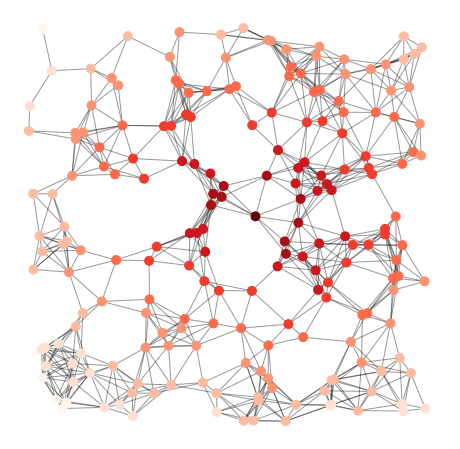

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx


G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

## Image processing

**Face recognition** : By the help of `opencv` package it's easy to do image processing on images. Face recognition is a neat example.

In [6]:
import cv2
from matplotlib import pyplot as plt

# Create the haar cascade
cascPath = "data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [7]:
# Read the image
image = cv2.imread("images/SolvayConference1927.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)

In [9]:
print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Found 29 faces!


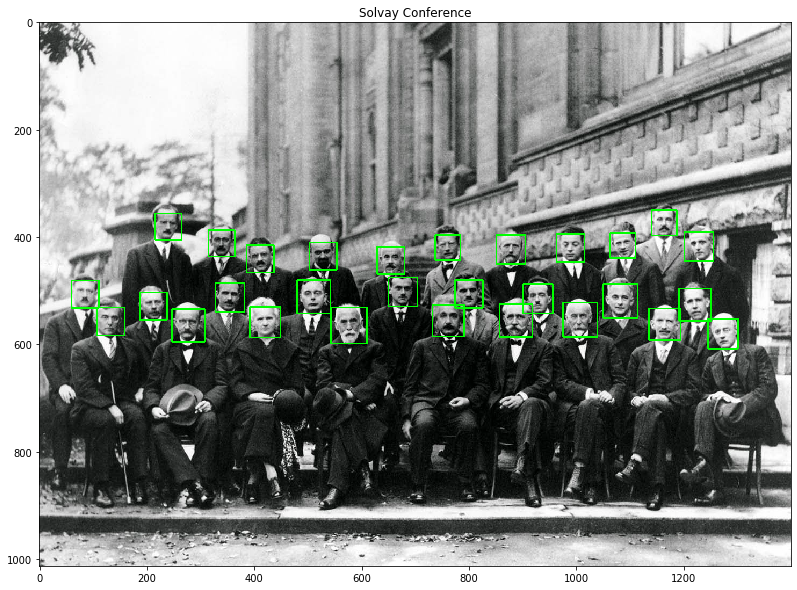

In [10]:
plt.figure(figsize = (20,10))
plt.imshow(image)
plt.title('Solvay Conference')
plt.show()

Please visit [this page](https://rarehistoricalphotos.com/solvay-conference-probably-intelligent-picture-ever-taken-1927/) for the attendees of the conference.

> Can you fix the false detection (third from left, sitting) by adjusting `scaleFactor` or other parameters?

**Image processing with scikit-image**: This package contains many functions for image processing. Below is an example for *edge detection*

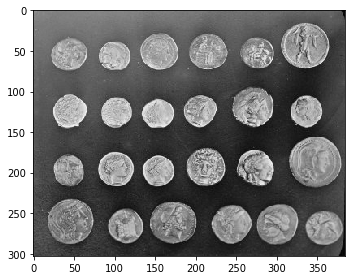

In [11]:
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
io.show()


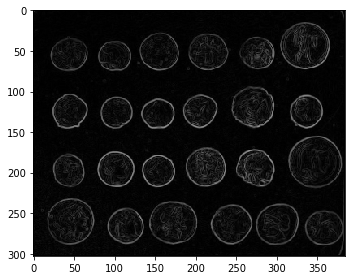

In [12]:
edges = filters.sobel(image)
io.imshow(edges)
io.show()

# Data science

Python is also very prominent in field of data science. Here's the list of packages grouped by different steps of data analysis.

![](images/py-data-science.png)

## Pandas

[Pandas](https://pandas.pydata.org/) pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Pandas is an essential library for data science.

Here's a glimpse of what Pandas can do.

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("data/OfficeSupplies.csv")

In [15]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


Let's try to find out

* What rep sold the most?
* What region sold the most?

In [16]:
# who sold the most
df.groupby(["Rep"]).sum().sort_values("Units", ascending=False)

,Units,Unit Price
Rep,,
Richard,396,55.92
Alex,281,39.95
Bill,213,40.55
Matthew,193,173.93
Rachel,183,10.26
Morgan,173,26.47
Susan,170,55.97
Smith,156,141.29
James,142,299.97


In [17]:
df["Total Price"] = df["Units"] * df["Unit Price"]
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-2014,East,Nick,Binder,29,1.99,57.71
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-2014,East,Susan,Binder,81,19.99,1619.19
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95,1005.90


In [18]:
# who sold the most in total dollar amount
df.groupby("Rep").sum().sort_values("Total Price", ascending=False).head()

,Units,Unit Price,Total Price
Rep,,,
Matthew,193,173.93,3109.44
Susan,170,55.97,3102.30
Alex,281,39.95,2812.19
Richard,396,55.92,2363.04
Bill,213,40.55,1749.87


In [19]:
# what region sold the most
group = df.groupby(["Region","Rep"]).sum()
total_price = group["Total Price"].groupby(level=0, group_keys=False)
total_price.nlargest(5)

Region   Rep    
Central  Matthew    3109.44
         Alex       2812.19
         Bill       1749.87
         Smith      1641.43
         Morgan     1387.77
East     Susan      3102.30
         Richard    2363.04
         Nick        536.75
West     James      1283.61
         Thomas     1203.11
Name: Total Price, dtype: float64

## Bokeh

Visualization is a must for data science to explore the data and to communicate the findings. `matplotlib` is used for visualization but it generates static images. If you need interactive plots then Bokeh is the library to go. Bokeh is an interactive visualization library that targets modern web browsers for presentation. 

Please visit [its gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html) for stunning examples.

In [20]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [21]:
n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

p = figure(title="Hexbin for 500 points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))

show(p)

In [22]:
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.sampledata.autompg import autompg

source = ColumnDataSource(autompg)

options = dict(plot_width=300, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(title="MPG by Year", **options)
p1.circle("yr", "mpg", color="blue", source=source)

p2 = figure(title="HP vs. Displacement", **options)
p2.circle("hp", "displ", color="green", source=source)

p3 = figure(title="MPG vs. Displacement", **options)
p3.circle("mpg", "displ", size="cyl", line_color="red", fill_color=None, source=source)

p = gridplot([[ p1, p2, p3]], toolbar_location="right")

show(p)

# Machine learning / Deep learning

[Tensorflow](https://www.tensorflow.org/) framework is used for Deep Learning/Machine Learning.

Below are two notebooks demonstrating deep learning approaches (they will run in Google Colab).

* [mnist example](https://colab.research.google.com/drive/1rWbhvaRQUDK1Nu79RH570UMqMKpMkhMP)
* [fashion-mnist example](https://colab.research.google.com/drive/1fmWvLdV1QOx1rvDlVwizeIXIY3A-MNEk)


# Web Apps via API

In [7]:
import requests
data = requests.get("https://barebone-serverless-flask-api-zeit-now.alperyilmaz.now.sh/isPrime/982451653")
#data = requests.get("https://api.exchangeratesapi.io/latest?symbols=USD,GBP")

In [8]:
data.text

'true\n'

# DASK

# Bioinformatics

[BioPython](https://biopython.org/) is used for biological computation and bioinformatics. Please visit [another Jupyter notebook](http://bitly.com/biopython-jupyter) for examples.

# Installing packages 

During the lecture we used several libraries and they were already installed in the notebook. What if you want to use special commands for your project, assignment or hobby? It's highly likely that someone else wrote a package for your topic of interest. In that case, it's very easy to install and use a package.

The installation of a package is done by `pip install packagename` command. However, this is not a Python command, it's a terminal command, thus needs to be send to terminal. So, we need to use exclamation mark, `!`, in front of the command.

You can search for packages at [PyPI](https://pypi.org/) website. 

Let's try a package called `dnacurve`. When we search for that package name, we land at [dnacurve package information page](https://pypi.org/project/dnacurve/). The site tells us how to install the package, which is `pip install dnacurve`. Let's run the command with exclamation mark.

In [23]:
!pip install dnacurve

The message says the package is successfully installed. From the [package information page](https://pypi.org/project/dnacurve/) we can get sample code.

In [24]:
from dnacurve import CurvedDNA
result = CurvedDNA('ATGCAAATTG'*5, 'trifonov', name='Example')
result.curvature[:, 18:22]

array([[0.58061616, 0.58163338, 0.58277938, 0.583783  ],
       [0.08029914, 0.11292516, 0.07675816, 0.03166286],
       [0.57923902, 0.57580064, 0.57367815, 0.57349872]])

In [25]:
result.save_csv('_test.csv')
result.save_pdb('_test.pdb')
result.plot('_test.png', dpi=160)

You can check the png or csv file in current working directory.